# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

**Цель исследования**: найти модель с наибольшим значением *accuracy*, не менее 0.75.

**Задачи**:

1. Изучить полученные данные.
2. Разделить исходные данные на обучающую, валидационную и тестовую выборки.
3. Исследовать качество разных моделей, меняя гиперпараметры.
4. Проверить качество модели на тестовой выборке.
5. Сделать вывод по результатам исследования.

## Откройте и изучите файл

In [1]:
import pandas as pd #импортируем библиотеки
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('/datasets/users_behavior.csv')
data.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


На первый взгляд все данные в порядке. Все названия столбцов в правильной форме. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Все столбцы приведены к адекватному для них типу данных. 

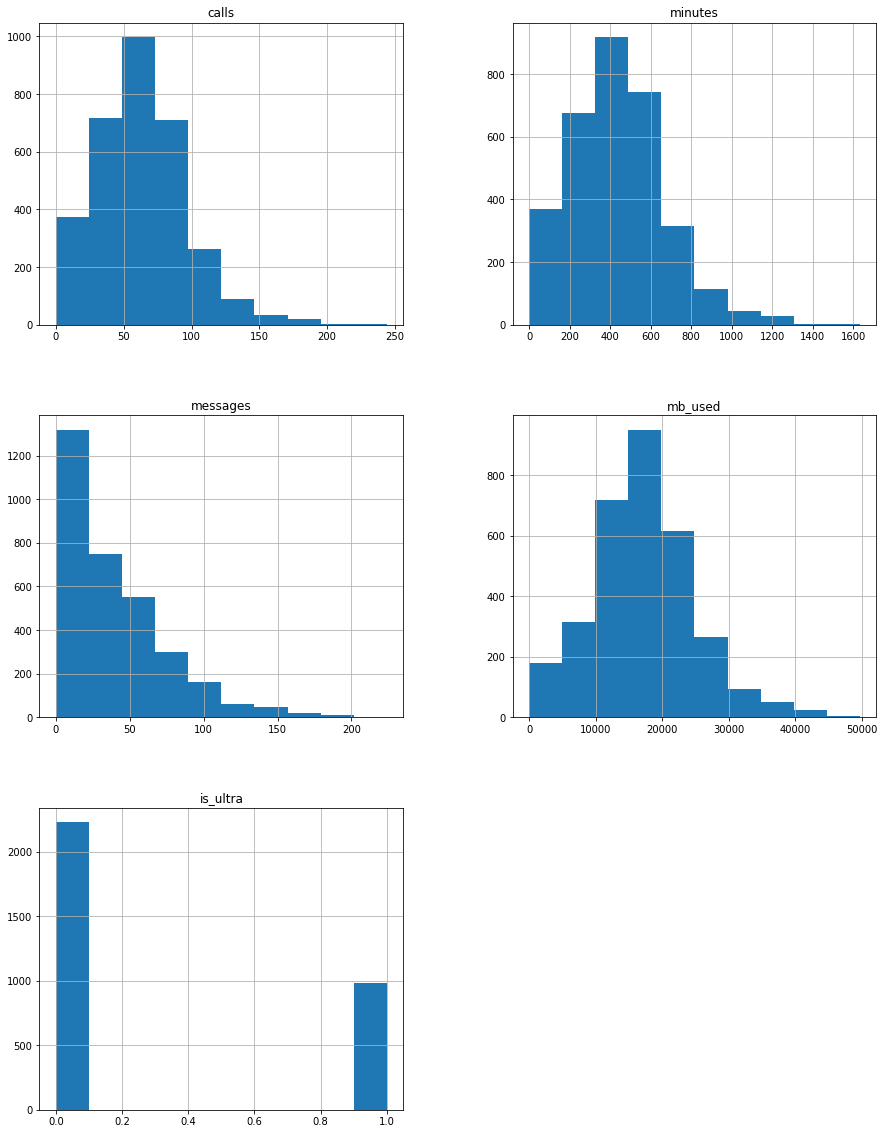

In [4]:
data.hist(figsize=(15, 20));

* сalls: больше всего клиенты совершают от 50 до 80 звонков в месяц, больше 200 практически никто;
* minutes: около 90% всех клиентов тратят от 0 до 800 минут за месяц, больше всего этот показатель в районе 500 минут;
* messages: сообщения не пользуются особой популярностью (из-за развития интернета), видно, что чем больше сообщений, тем меньше клиентов их отправляют;
* mb_used: чаще всего клиенты используют от 10000 до 30000 Мб в месяц, в этом промежутке лежит примерно 80%;
* is_ultra: по графику видно, что тариф "Смарт" пользуется большей популярностью, чем "Ультра", его используют больше, чем в 2 раза больше клиентов, по сравнению с "Ультра".

In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

Дубликаты и пустые значение отсутствуют.

## Разбейте данные на выборки

In [7]:
data_train, data_test = train_test_split(data, test_size=0.4, random_state=12345) 

features_train = data_train.drop(['is_ultra'], axis=1)
target_train = data_train['is_ultra']

features = data_test.drop('is_ultra', axis=1)
target = data_test['is_ultra']
features_valid, features_test, target_valid, target_test = train_test_split(features, target, test_size=0.5, random_state=12345)

**Получились следущие соотношения:**
* features_train, target_train - обучающая выборка (60%)
* features_valid, target_valid - валидационная выборка (20%)
* features_test, target_test - тестовая выборка (20%)

## Исследуйте модели

### Дерево решений

In [8]:
best_result = 0
best_depth = 0
for depth in range(1,15):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_result = result
        best_depth = depth
print(f'Глубина дерева: {best_depth}')
print(f'Качество: {best_result}')

Глубина дерева: 3
Качество: 0.7853810264385692


### Логистическая регрессия

In [9]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_train, target_train)
accuracy = model.score(features_valid, target_valid)
print(f'Качество: {accuracy}')

Качество: 0.7107309486780715


### Случайный лес

In [10]:
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        result = model.score(features_valid, target_valid)
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth
print(f'Глубина дерева: {best_depth}')
print(f'Качество: {best_result}')
print(f'Количество деревьев: {best_est}')

Глубина дерева: 8
Качество: 0.8087091757387247
Количество деревьев: 40


**Итог:**
* для дерева решений лучшей глубиной дерева оказалось 3, а качество составляет около 0.78;
* для логистической регрессии качество составляет примерно 0.71;
* для случайного леса глубина лучшего дерева = 8, количество деревьев = 40, а качество ~ 0.81.

Лучшим качеством и одновременно худшей скоростью обладает случайный лес. Худшее качество показала логистическая регрессия. 

## Проверьте модель на тестовой выборке

### Дерево решений

In [11]:
model = DecisionTreeClassifier(max_depth=7, random_state=12345)
model.fit(features_train, target_train)
accuracy = model.score(features_test, target_test)
print(f'Качество: {accuracy}')

Качество: 0.7993779160186625


### Логистическая регрессия

In [12]:
model = LogisticRegression(solver='lbfgs', random_state=12345)
model.fit(features_train, target_train)
accuracy = model.score(features_test, target_test)
print(f'Качество: {accuracy}')

Качество: 0.6842923794712286


### Случайный лес

In [13]:
model = RandomForestClassifier(max_depth=8, n_estimators=40, random_state=12345)
model.fit(features_train, target_train)
accuracy = model.score(features_test, target_test)
print(f'Качество: {accuracy}')

Качество: 0.7962674961119751


## Вывод

Таким образом, было проведено исследование на трех моделях:
1. Дерево решений;
2. Логистическая регрессия;
3. Случайный лес.

Лучшее качество было показано у случайного леса ~0.81 с гиперпараметрами *n_estimators*=40, *max_depth*=8.